In [1]:
#Essential imports: sklearn with version 0.23 or later and numpy with version 1.19 or later
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from matplotlib import style
style.use('dark_background')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) #Evitar los warnings de sklearn con KNN

# Análisis de resultados

Aunque se ha tratado en otras asignaturas del máster, en esta práctica revisitaremos las técnicas de validación, evaluación y métricas en las principales bibliotecas de Python para Data Science.
Tomaremos un conjunto clásico de ejemplo para regresión, y produciremos diferentes esquemas de evaluación y métricas interesantes.
De igual forma, avanzando el resto de guiones que tendremos sobre clasificación, realizaremos un ejemplo similar para clasificación en el que nos centraremos en las métricas de clasificación.

## Métricas de evaluación para regresión

In [2]:
#Vamos a generar un pequeño modelo de regresión sobre el conjunto diabetes, para examinar sus resultados

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X)


En *y_pred* tendremos las predicciones generadas por el modelo, gracias a la función *predict* (más sobre esto en la segunda parte del guión).
Para poder estimar la bondad de las predicciones, tendremos que evaluar algunas métricas que permitan comparar las predicciones de cada ejemplo que hemos proporcionado a la función predict frente a su salida real.

Vamos a repasar las principales incluidas en sklearn (https://scikit-learn.org/stable/modules/model_evaluation.html): Error absoluto medio, error cuadrático medio y el coeficiente R<sup>2</sup>.

El error absoluto medio (MAE) es la medida de evaluación más sencilla, y no es tan popular como el RMSE. El error cuadrático medio (MSE) es más sensible a outliers comparadro con el MAE. Una forma de suavizar el MSE es utilizar la raíz del MSE (RMSE). Se definen como sigue:

![MAE](./img/mae-1.PNG)

![MSE](./img/mse.PNG)

![RMSE](./img/rmse.PNG)

donde $y_i$ es la etiqueta real y $\hat{y}_i$ la etiqueta predicha por el modelo para el ejemplo de test $i$.

Todos estos coeficientes generan valores en un rango que dependerá del problema, lo que dificulta la comparación entre problemas diferentes. El coeficiente R<sup>2</sup> establece un valor acotado entre 0 y 1. En particular, explica hasta qué punto las variables de entrada explican la **variación** de la variable de salida. La definción de R<sup>2</sup> es:

![R<sup>2</sup>](./img/rsquare-1.PNG)

Es importante indicar que R<sup>2</sup> tiene limitaciones: añadir más variables siempre hará que R<sup>2</sup> se incremente, aunque las variables añadidas **no** aporten información sobre la variable de salida. Existe una alternativa R<sup>2</sup> ajustada que no tiene estos problemas.

![R<sup>2</sup>](./img/adj.PNG)

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

Mean squared error:  2859.6963475867506
Mean absolute error:  43.27745202531507
R2 score:  0.5177484222203498


## Métricas de evaluación para clasificación
De forma breve, vamos a repasar las métricas de evaluación para clasificación más populares sobre el conjunto iris utilizando KNN, visto ya en asignaturas previas.

Vamos a "crear" un KNN sobre el conjunto completo.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

breastCancer = datasets.load_breast_cancer()
X = breastCancer.data
y = breastCancer.target

knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X, y)

knn_predictions = knn_model.predict(X)


Para evaluar modelos de clasificación, las métricas no pueden ser las mismas que los modelos de regresión. Las etiquetas son nominales (texto o índices de texto) y no podemos hacer cálculos sobre ellas (restas, cuadrados, etc.)

Es por ello que debemos tener en cuenta la matriz de confusión, que generará las diferentes métricas de evaluación. Recordémosla:

![Matriz de confusión](./img/cm.PNG)

Vamos a definir algunas métricas en base a los valores FP, FN, TP y TN.

La precisión (**Accuracy**) se define como la relación entre el número de predicciones correctas y el número total de predicciones. Se sitúa entre [0,1]. En general, una mayor precisión significa un mejor modelo (TP y TN deben ser altos).

![Accuracy](./img/acc.PNG)

El **Accuracy** tiene problemas con el desequilibrio de la cantidad de ejemplos de diferente clases. Por este motivo, aparecen otras métricas como Precision y Recall. 

El **Recall** es una métrica útil en el caso de la detección del cáncer, donde queremos minimizar el número de falsos negativos para cualquier uso práctico, ya que no queremos que nuestro modelo marque como seguro a un paciente que padece cáncer. Por otro lado, predecir un paciente sano como canceroso no es un gran problema ya que, en un diagnóstico posterior, se aclarará que no tiene cáncer. El Recall también se conoce como Sensibilidad.

**Precision** es útil cuando queremos reducir el número de falsos positivos. Consideremos un sistema que predice si el correo electrónico recibido es spam o no. Tomando el spam como clase positiva, no queremos que nuestro sistema prediga como spam los correos electrónicos que no son spam (correos importantes), es decir, el objetivo es reducir el número de falsos positivos.

![Precision y Recall](./img/pre.PNG)

La especificidad (**Specifity**) se define como la relación entre TN y TN + FP. Queremos que el valor de la especificidad sea alto. Su valor se sitúa entre [0,1]. Si nos fijamos, es la defición de **Recall** para la clase negativa.

![Specifity](./img/spec.PNG)

El **F1-score** es una métrica que combina Precision y Recall y equivale a la media armónica de la precisión y la recuperación. Su valor se sitúa entre [0,1] (cuanto más alto sea el valor, mejor será la puntuación F1).

![F1-score](./img/f1.PNG)


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

print("Accuracy: ", accuracy_score(y, knn_predictions), "\n\t Con el método score: ", knn.score(X, y)) #El método score es equivalente a accuracy_score en este caso
print("Recall: ", recall_score(y, knn_predictions))
print("Precision: ", precision_score(y, knn_predictions))
print("F1 score: ", f1_score(y, knn_predictions))

#Para Specifity, podemos indicar que la etiqueta positiva es 0 (si anteriormente era 1)
print("Specifity: ", recall_score(y, knn_predictions, pos_label=0))

#Existe la posibilidad de obtener un informe de todas las métricas principales de clasificación mediante classification_report
#Observa como para la fila de la clase 0, el valor de recall es el mismo que el de specifity obtenido anteriormente
print("Informe completo\n",classification_report(y, knn_predictions))

Accuracy:  0.9472759226713533 
	 Con el método score:  0.9472759226713533
Recall:  0.9747899159663865
Precision:  0.943089430894309
F1 score:  0.9586776859504134
Specifity:  0.9009433962264151
Informe completo
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       212
           1       0.94      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.94       569
weighted avg       0.95      0.95      0.95       569



## Área bajo la curva ROC (AUC-ROC)
Una forma de comparar el rendimiento de un modelo frente a ambas clases es el área bajo la curva ROC. Enfrenta, en un gráfico, el valor de FPR (False Positive Rate) y el TPR (True Positive Rate). TPR y FPR se definen así:

![FPR y TPR](./img/Capture-3.PNG)

El área bajo la curva resultante es un resumen del rendimiento en estas dos características, con un valor en el intervalo [0,1]. Cuanto más cercano a 1, mejor. Un valor de 0,5 se considera equivalente a un predictor completamente aleatorio (e inútil).

![Ejemplos de curvas ROC y su utilidad](./img/auc.PNG)


0.9378666560964009
TPR:  [0.         0.97478992 1.        ]
FPR:  [0.        0.0990566 1.       ]
0.9378666560964009


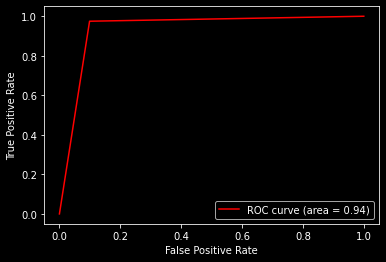

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

#Vamos a imprimir el área bajo la curva ROC para el modelo KNN
print(roc_auc_score(y, knn_predictions))

#Podemos obtener los valores de TPR y FPR usando la función roc_curve
fpr, tpr, thresholds = roc_curve(y, knn_predictions)
print("TPR: ", tpr)
print("FPR: ", fpr)
#Podemos calcular el área bajo la curva ROC usando la función auc y los valores de TPR y FPR
print(auc(fpr, tpr))

#A continuación, vamos a mostrar la figura de la curva ROC
plt.figure()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, color='red', label="ROC curve (area = %0.2f)" % auc(fpr, tpr));
plt.legend(loc="lower right");

# Esquemas de validación y particionamiento
Hasta ahora, hemos generado un modelo sobre el conjunto completo y evaluado el rendimiento sobre el propio conjunto de entrenamiento (el conjunto completo).
Como hemos visto en asignaturas previas, no es una buena idea:
1. Hay un gran sesgo, ya que el modelo predice sobre los ejemplos que conoce.
2. Desconocemos su capacidad de tratar con ejemplos nunca vistos (habilidad de generalización del modelo).
3. Cualquier ajuste de parámetros producirá un sobreajuste seguramente.

Es necesario realizar algún tipo de partición para evitar estos problemas. Los diferentes tipos de particionamiento del conjunto completo para poder validar correctamente el rendimiento del modelo generado se les conoce como esquemas de validación o particionamiento.

## Hold-out

Vamos a crear un esquema de validación Hold-out, el más simple. Partimos aleatoriamente el conjunto en 2 partes, de tamaños arbitrarios. Una parte será el conjunto de entrenamiento y otro el de test.

Utilizamos la función train_test_split() de https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Juega con diferentes tamaños de partición para observar su efecto en las diferentes métricas.

In [7]:
#Por si acaso, vamos a cargar el conjunto de datos de cancer de mama de nuevo
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

breastCancer = datasets.load_breast_cancer()
X = breastCancer.data
y = breastCancer.target

#Vamos a dividir el conjunto de datos en un conjunto de entrenamiento y otro de test con un 20% de los datos para test y 80% para entrenamiento
#No queremos que los datos se desordenen respecto a su orden inicial, por lo que indicamos shuffle=false
#Ojo con el parámetro shuffle: https://scikit-learn.org/stable/modules/cross_validation.html#a-note-on-shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False);

knn = KNeighborsClassifier(n_neighbors=5)
#OJO: ahora entrenamos el modelo con los datos de entrenamiento
knn_model = knn.fit(X_train, y_train)

#Y ahora obtenemos las predicciones para los datos de test
knn_predictions = knn_model.predict(X_test)

#Vamos a mostrar las métricas de rendimiento sobre el conjuto de test Y_test
print("Informe completo\n",classification_report(y_test, knn_predictions))

Informe completo
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       0.99      0.93      0.96        88

    accuracy                           0.94       114
   macro avg       0.90      0.95      0.92       114
weighted avg       0.95      0.94      0.94       114



## Repeated Hold-out

Uno de los principales problemas del Hold-out es la dependencia de los buenos (o malos) resultados de nuestro modelo a la elección aleatoria de los datos que pertenecen al conjunto de entrenamiento y de test.

Para disminuir el efecto de esta aleatoriedad, podemos realizar varios Hold-out de forma repetida, de forma que, en promedio, los ejemplos difíciles estarán alternativametne en el entrenamiento o en el test. A este esquema se le conoce como **Repeated Hold-out**.

Para simularlo (Scikitlearn no tiene una función específica), usamos ShuffleSplit para realizar tantos splits (repeticiones) como queramos de un Hold-out.

Para nuestro ejemplo, recorremos con un bucle cada partición/split y ajustamos el modelo KNN para ver el resultado.

In [8]:
from sklearn.model_selection import ShuffleSplit

#Con n_splits controlamos cuántas veces queremos repetir el Hold-out. El parámetro random_state actúa como la semilla para la generación de las particiones
repeatedHoldOut = ShuffleSplit(n_splits=15, test_size=0.25, random_state=100)
knn = KNeighborsClassifier(n_neighbors=5) #Vamos a usar el mismo modelo que antes

breastCancer = datasets.load_breast_cancer()
X = breastCancer.data
Y = breastCancer.target

for train_index, test_index in repeatedHoldOut.split(X):
    X_train, Y_train = X[train_index], Y[train_index]    
    X_test, Y_test = X[test_index], Y[test_index]
    knn.fit(X_train,Y_train)
    prediccion = knn.score(X_test, Y_test)
    print("Accuracy: ", prediccion)
    
#Ejercicio: Calcular la media de los valores de accuracy obtenidos en el bucle anterior

Accuracy:  0.958041958041958
Accuracy:  0.9440559440559441
Accuracy:  0.9300699300699301
Accuracy:  0.9230769230769231
Accuracy:  0.9090909090909091
Accuracy:  0.9370629370629371
Accuracy:  0.958041958041958
Accuracy:  0.916083916083916
Accuracy:  0.9370629370629371
Accuracy:  0.9300699300699301
Accuracy:  0.9090909090909091
Accuracy:  0.9020979020979021
Accuracy:  0.9440559440559441
Accuracy:  0.9370629370629371
Accuracy:  0.9370629370629371


## Validación cruzada

Un problema que tiene el Hold-out repetido radica en la falta de independencia de las particiones realizadas: los ejemplos pueden encontrarse repetidamente en entrenamiento y test, lo que hace que los valores de test calculados no tengan *independencia*.

Para garantizar la independencia (y por tanto, su generalidad) de las particiones de test, sería importante realizar la partición repetida del Hold-out de forma que cada ejemplo sólo pueda estar una vez en una partición de test.

Este concepto es el que propone la **Validación cruzada**. Se determina el número de conjuntos de test que se crearán y cada ejemplo sólo podrá aparecer en uno de dichos conjuntos de test. Las particiones de entrenamiento asociadas a cada conjunto de test contendrán todos los ejemplos que no están en dicho conjunto de test. Por lo tanto, para $K$ conjuntos de test, cada ejemplo estará en $K-1$ conjuntos de entrenamiento.

![Validación cruzada](./img/Cross_Validation.jpg)

In [9]:
#En primer lugar, vamos a realizar el trabajo de particionar y entrenar el modelo con el conjunto de datos de entrenamiento para cada split/fold de forma manual
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

# KFold permite realizar particiones de los datos en K folds
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

#Cargamos Iris
iris = load_iris()
X = iris.data
y = iris.target

#La función split de KFold devuelve los índices de los datos de entrenamiento y test para cada fold
#Siendo un generator, podemos iterar sobre él para obtener los índices de cada fold
#Será necesario aplicar los índices sobre el conjunto X y el conjunto y para obtener los datos de entrenamiento y test para cada fold
for train_index, test_index in kf5.split(X,y):
    X_train = X[train_index]
    y_train = y[train_index]
    
    X_test = X[test_index]
    y_test = y[test_index]
    
    knn.fit(X_train,y_train)
    prediccion = knn.score(X_test, y_test)
    print("Accuracy: ", prediccion)

#Normalmente, se hará la media del Accuracy de los diferentes fold

Accuracy:  1.0
Accuracy:  1.0
Accuracy:  0.8333333333333334
Accuracy:  0.9333333333333333
Accuracy:  0.8


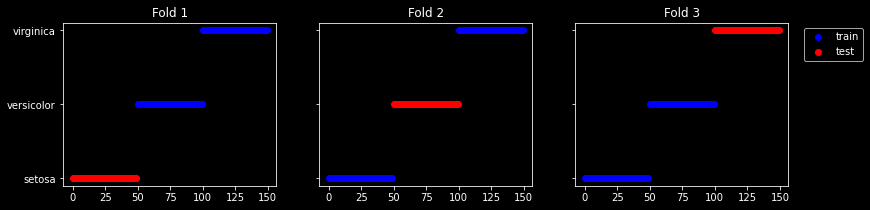

Accuracy para el fold de TEST 1: 0.0
Accuracy para el fold de TEST 2: 0.0
Accuracy para el fold de TEST 3: 0.0


In [10]:
#Vamos a examinar la opción shuffle=True
#Si no la activamos, los datos se dividirán en los folds de forma secuencial, en el orden original del conjunto.
#Vamos a examinar cómo están los datos originalmente en Iris (cargamos iris como un DataFrame para poder tener los nombres de las clases)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

features = iris['feature_names'] #Obtenemos los nombres de las columnas
iris_df['target'] = iris.target #Añadimos la columna target
iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)}) #Añadimos la columna target_name para tener los nombres de las clases

target_name = iris_df["target"]

fig, ax = plt.subplots(1,3, figsize=(13,3), sharey=True)
for i, (train_index, test_index) in enumerate(kf3.split(iris_df)): #Ojo como utilizamos el K-Fold de 3 folds para iterar sobre el DataFrame y obtener las 3 clases de forma secuencial, ya que Iris tiene 3 clases de 50 ejemplos cada una...
    ax[i].scatter(x=train_index,y=target_name.iloc[train_index],label ="train", c='b')
    ax[i].scatter(x=test_index,y=target_name.iloc[test_index], label = "test", c='r')
    ax[i].set_title(f"Fold {i+1}")

ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels(iris["target_names"])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

#Si ahora entrenamos sobre los datos de entrenamiento de cada fold con shuffle=False y obtenemos el accuracy sobre los datos de test, veremos que el accuracy es cero, ya que no hay ejemplos de las otras clases en cada partición de entrenamiento
i = 1
for train_index, test_index in kf3.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index][features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index]['target']
        
    #Entrenamos y evaluamos
    knn.fit(X_train, y_train) #Training the model
    print(f"Accuracy para el fold de TEST {i}: {accuracy_score(y_test, knn.predict(X_test))}")
    i += 1
    


Accuracy para el fold de TEST 1: 0.98
Accuracy para el fold de TEST 2: 0.9
Accuracy para el fold de TEST 3: 1.0


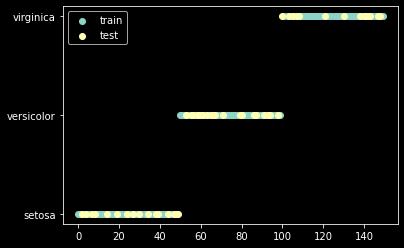

In [11]:
#Para evitar este tipo de problemas, debemos utilizar la opción shuffle=True
kf = KFold(n_splits=3, shuffle=True, random_state=100)

i = 1
for train_index, test_index in kf.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Entrenamos y evaluamos
    knn.fit(X_train, y_train) #Training the model
    print(f"Accuracy para el fold de TEST {i}: {accuracy_score(y_test, knn.predict(X_test))}")
    i += 1
    
#Vamos a ver cómo se distribuyen los datos en cada fold
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()


Además de la importancia de la opción *shuffle* para la estratificación, existen problemas desequilibrados en los que el simple muestreo puede generar particiones de test aún más desequilibradas o incluso sin algunos ejemplos de ciertas clases.

Una forma de evitar esto es usar el K-Fold **estratificado**, el cual genera folds o splits que mantienen la misma proporción de ejemplos del dataset original.

Accuracy para el fold de TEST 1: 0.96
Accuracy para el fold de TEST 2: 0.94
Accuracy para el fold de TEST 3: 0.98


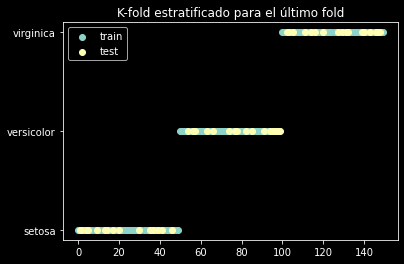

In [12]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)
i = 1
for train_index, test_index in kf.split(iris_df, iris_df["target"]):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']

    #Entrenamos y evaluamos
    knn.fit(X_train, y_train) #Training the model
    print(f"Accuracy para el fold de TEST {i}: {accuracy_score(y_test, knn.predict(X_test))}")
    i += 1
    
#Observa los resultados en comparación al Kfold anterior con shuffle: el comportamiento en las diferentes particiones es mucho más homogéneo

plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.title("K-fold estratificado para el último fold")
plt.show()



Como realizar el K-fold es habitual y utilizar los índices para luego acceder a nuestro Dataframe o Array genera mucho código repetido, Scikit learn proporciona la funicón *cross_validate* que realiza la misma tarea en una única llamada. A cambio, perdemos el control de los índices generados y cualquier posibilidad de análisis forense posterior.

In [13]:
from sklearn.utils import shuffle


cv = cross_validate(knn, X, y, cv=3)
cv.keys() #Vemos que es un Dataframe

#Vamos a ver los resultados en test
i = 1
for score in cv['test_score']:
    print(f"Accuracy en el fold {i}: {score}")
    i += 1

#Existe la posibilidad de usar un objeto KFold definido previamente para realizar la validación cruzada con cross_validate
#Es la forma de controlar las opciones de shuffle y random_state entre otras para nuestra validación cruzada con cross_validate
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100) #Prueba a jugar con los argumentos aquí
cv = cross_validate(knn, X, y, cv=kf)
for score in cv['test_score']:
    print(f"Accuracy en el fold {i} con un objeto kf: {score}")
    i += 1


Accuracy en el fold 1: 0.98
Accuracy en el fold 2: 0.98
Accuracy en el fold 3: 0.98
Accuracy en el fold 4 con un objeto kf: 0.96
Accuracy en el fold 5 con un objeto kf: 0.94
Accuracy en el fold 6 con un objeto kf: 0.98


In [13]:
#Si no queremos todas las métricas, podemos utilizar un objeto de tipo cross_val_score para obtener solo el accuracy, por ejemplo

cv = cross_val_score(knn, X, y, cv=3)
#print(cv) #Vemos que es un array, ya no es un dataframe como en el caso anterior con diferentes medidas
i=1
for score in cv:
    print(f"Accuracy en el fold {i}: {score}")
    i += 1
    
#Vamos a probar cross_val_score con otra medida de rendimiento, el F1-score
#Debemos crear un objeto scorer con la medida que nos interesa previamente

from sklearn.metrics import make_scorer #Mal sitio para el import, pero bueno

f1=make_scorer(f1_score, average='weighted')
cv = cross_val_score(knn, X, y, cv=3, scoring = f1)
i=1
for score in cv:
    print(f"F1 en el fold {i}: {score}")
    i += 1

Accuracy en el fold 1: 0.98
Accuracy en el fold 2: 0.98
Accuracy en el fold 3: 0.98
F1 en el fold 1: 0.979963133640553
F1 en el fold 2: 0.979963133640553
F1 en el fold 3: 0.979982683982684


## Leave-one out

Un caso extremo de K-fold cross validation es cuando el número de folds/splits coincide con el número de ejemplos del dataset completo. En este caso, cada ejemplo actúa como una partición de test. De forma alternativa, todos los ejemplos menos uno se combinan para generar un conjunto de entrenamiento y se prueban sobre el ejemplo que se ha dejado fuera.

Tiene especial relevancia para modelos Lazy (como KNN), cuando queremos evaluar su comportamiento sobre el conjunto completo sin incurrir en un error de sesgo.

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

i=1
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)
    
     #Entrenamos y evaluamos
    knn.fit(X_train, y_train) #Training the model
    print(f"Accuracy para el ejemplo de TEST {i}: {accuracy_score(y_test, knn.predict(X_test))}")
    i += 1


TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] TEST: [0]
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.

## Ejercicios propuestos
1. Calcule el valor de R<sup>2</sup> ajustado según la equación proporcionada y compare su valor con R<sup>2</sup>.

![R<sup>2</sup>](./img/adj.PNG)

In [18]:
diabetes = load_diabetes()

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X)

print("Mean squared error: ", mean_squared_error(y, y_pred))
print("Mean absolute error: ", mean_absolute_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

AdjustedR= 1-(((1-r2_score(y,y_pred))*(len(diabetes.data)-1))/(len(diabetes.data)-len(diabetes.data[0])-1))
print("Adjusted R2 score: ", AdjustedR)

Mean squared error:  2859.6963475867506
Mean absolute error:  43.27745202531507
R2 score:  0.5177484222203498
Adjusted R2 score:  0.5065592904853231


2. Manipule el número de vecinos de KNN para observar cómo afecta al rendimiento del modelo. ¿Qué ocurreo con Precision y Recall cuando aumenta el número de vecinos?


In [22]:
def Test_knn_breast_cancer(k):
    breastCancer = datasets.load_breast_cancer()
    X = breastCancer.data
    y = breastCancer.target

    knn = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn.fit(X, y)

    knn_predictions = knn_model.predict(X)
    print('Metricas para {k} vecinos mas cercanos:'.format(k=k))
    print("Accuracy: ", accuracy_score(y, knn_predictions))
    print("Recall: ", recall_score(y, knn_predictions))
    print("Precision: ", precision_score(y, knn_predictions))
    print("F1 score: ", f1_score(y, knn_predictions))


In [23]:
for i in range(5,15):
    Test_knn_breast_cancer(i)

Metricas para 5 vecinos mas cercanos:
Accuracy:  0.9472759226713533
Recall:  0.9747899159663865
Precision:  0.943089430894309
F1 score:  0.9586776859504134
Metricas para 6 vecinos mas cercanos:
Accuracy:  0.9420035149384886
Recall:  0.9607843137254902
Precision:  0.9475138121546961
F1 score:  0.9541029207232267
Metricas para 7 vecinos mas cercanos:
Accuracy:  0.9437609841827768
Recall:  0.969187675070028
Precision:  0.9427792915531336
F1 score:  0.9558011049723757
Metricas para 8 vecinos mas cercanos:
Accuracy:  0.9384885764499121
Recall:  0.957983193277311
Precision:  0.9447513812154696
F1 score:  0.9513212795549375
Metricas para 9 vecinos mas cercanos:
Accuracy:  0.9420035149384886
Recall:  0.9663865546218487
Precision:  0.9426229508196722
F1 score:  0.9543568464730291
Metricas para 10 vecinos mas cercanos:
Accuracy:  0.9420035149384886
Recall:  0.9635854341736695
Precision:  0.945054945054945
F1 score:  0.9542302357836339
Metricas para 11 vecinos mas cercanos:
Accuracy:  0.940246045

Podemos ver como la accuracy desciende cuanto más aumentas el valor de K. Sin embargo el descenso del Recall y la precisión no es tan pronunciado

3. Hemos visto lo que ocurre con un problema de clasificación de 2 clases (Binario). Es normal encontrarnos con problemas de varias clases (multiclase). Visite https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules y en la sección 3.3.2.1 lea detenidamente cómo se puede agregar los valores de Precision, Recall, etc. para varias clases. Cargue un conjunto multiclase (por ej. Iris) y obtenga las métricas de rendimiento vistas para este conjunto multiclase, jugando con los diferentes tipos de promediado para observar las diferencias (si el problema escogido está desequilibrado, se observarán mejor).


4. Pruebe los diferentes esquemas de validación y diferentes métricas para otro problema diferente a Iris (https://scikit-learn.org/stable/datasets/toy_dataset.html). Procure escoger un problema con desequilibrio entre las clases. ¿Qué ocurre si es un problema multiclase?